# Animal Image Classification | Dog or Cat

Hello people, welcome to this kernel. In this kernel I am going to classify dog and cat images using Keras library. Before starting, let's take a look at the content of this kernel.


# Notebook Content
1. Importing Necessary Libraries
1. Importing The Data
1. Checking Random Samples
1. Data Augmentation
1. CNN Modeling
1. Evaluating Model
1. Conclusion

# Importing Necessary Libraries
In this section I am going to import necessary libraries.

In [1]:
import numpy as np
import cv2
import os
import time

import tensorflow as tf
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense,Activation
from keras.models import Sequential

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import warnings as wrn

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# Importing The Data

In this section I am going to import the data. In order to load the data, I will follow these steps:

1. Determining paths of folders
1. Determining paths of images
1. Reading and resizing images
1. Train validation splitting
1. Checking arrays

In [2]:
train_dog_path = '../input/dogs-cats-images/dataset/training_set/dogs'
train_cat_path = '../input/dogs-cats-images/dataset/training_set/cats'

test_dog_path = '../input/dogs-cats-images/dataset/test_set/dogs'
test_cat_path = '../input/dogs-cats-images/dataset/test_set/cats'


In [3]:
train_dog_paths = [os.path.join(train_dog_path,image) for image in os.listdir(train_dog_path)]
train_cat_paths = [os.path.join(train_cat_path,image) for image in os.listdir(train_cat_path)]

test_dog_paths = [os.path.join(test_dog_path,image) for image in os.listdir(test_dog_path)]
test_cat_paths = [os.path.join(test_cat_path,image) for image in os.listdir(test_cat_path)]

for path in train_cat_paths[:4]:
    print(path)

../input/dogs-cats-images/dataset/training_set/cats/cat.3457.jpg
../input/dogs-cats-images/dataset/training_set/cats/cat.2085.jpg
../input/dogs-cats-images/dataset/training_set/cats/cat.3087.jpg
../input/dogs-cats-images/dataset/training_set/cats/cat.1125.jpg


* Everything looks great, we can read images now. We will use opencv in order to read and resize images. 

In [4]:
# DOG 0
# CAT 1 

IM_SIZE = 150

start_time = time.time()

x_train = []
x_test = []
y_train = []
y_test = []

for image in train_dog_paths:
    try:
        im  = cv2.imread(image)
        im  = cv2.resize(im,(IM_SIZE,IM_SIZE))
        x_train.append(im)
        y_train.append(0)
    except:
        print("Something wrong happened when reading this file {}".format(image))

for image in train_cat_paths:
    try:
        im  = cv2.imread(image)
        im  = cv2.resize(im,(IM_SIZE,IM_SIZE))
        x_train.append(im)
        y_train.append(1)
    except:
        print("Something wrong happened when reading this file {}".format(image))

for image in test_dog_paths:
    try:
        im  = cv2.imread(image)
        im  = cv2.resize(im,(IM_SIZE,IM_SIZE))
        x_test.append(im)
        y_test.append(0)
    except:
        print("Something wrong happened when reading this file {}".format(image))

for image in test_cat_paths:
    try:
        im  = cv2.imread(image)
        im  = cv2.resize(im,(IM_SIZE,IM_SIZE))
        x_test.append(im)
        y_test.append(1)
    except:
        print("Something wrong happened when reading this file {}".format(image))

x_train,x_test,y_train,y_test = np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test)
        
end_time = time.time()
print("Reading and resizing images took {} minutes. ".format(round((end_time-start_time)/60),2)) 


Reading and resizing images took 1 minutes. 


In [5]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=1)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

print(x_val.shape)
print(y_val.shape)

(7200, 150, 150, 3)
(7200,)
(2000, 150, 150, 3)
(2000,)
(800, 150, 150, 3)
(800,)


# Checking Random Samples
In this section I am going to check random samples from train dataset. In order to see images I will use matplotlib's imshow function.

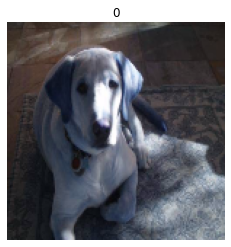

In [6]:
plt.imshow(x_train[3213])
plt.title(y_train[3213])
plt.axis("off")
plt.show()

* It looks very cute!

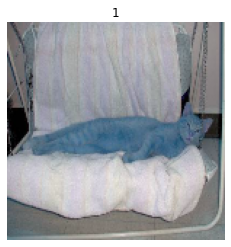

In [7]:
plt.imshow(x_train[7103])
plt.title(y_train[7103])
plt.axis("off")
plt.show()

* It looks very cute as well.

# Data Augmentation

In this section I am going to apply data augmentation techniques to my data. But before this I want to explain that why should we use data augmentation.

In deep learning, sometimes neural models memorize train dataset, so it can't be succesfull in test dataset and validation set, we call this as overfitting.

In order to avoid overfitting, we can increase the amount of data and we can use data augmentation. 

Now, I will create our image data generator.

In [8]:
datagen = ImageDataGenerator(horizontal_flip=True)

datagen.fit(x_train)

# CNN Modeling

In this section I am going to build and fit our CNN Model using Keras.

In [9]:
model = Sequential()

model.add(Conv2D(128,kernel_size=(4,4),strides=1,padding="same",input_shape=(IM_SIZE,IM_SIZE,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.4))

model.add(Conv2D(128,kernel_size=(4,4),strides=1,padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(4,4),strides=1,padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Dropout(0.4))

model.add(Conv2D(128,kernel_size=(4,4),strides=1,padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

opt = tf.keras.optimizers.RMSprop(lr=0.01)


model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 128)     6272      
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 128)     512       
_________________________________________________________________
activation (Activation)      (None, 150, 150, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       262272    
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 128)       5

In [10]:
BATCH_SIZE = 32
EPOCHS = 50


In [11]:
start_time = time.time()

model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
                    epochs=EPOCHS,
                    validation_data = (x_val,y_val),
                    steps_per_epoch = x_train.shape[0] // BATCH_SIZE
                   )

end_time = time.time()
process_time = round((end_time-start_time)/60,2)

print("Fitting model {} epochs took {} minutes.".format(EPOCHS,process_time))


Epoch 1/50
225/225 [==============================] - 20s 91ms/step - loss: 3.1838 - accuracy: 0.5281 - val_loss: 0.9533 - val_accuracy: 0.5688
Epoch 2/50
225/225 [==============================] - 20s 89ms/step - loss: 0.6685 - accuracy: 0.5943 - val_loss: 0.8072 - val_accuracy: 0.5450
Epoch 3/50
225/225 [==============================] - 20s 89ms/step - loss: 0.6349 - accuracy: 0.6325 - val_loss: 0.6524 - val_accuracy: 0.6087
Epoch 4/50
225/225 [==============================] - 20s 89ms/step - loss: 0.6175 - accuracy: 0.6587 - val_loss: 0.7959 - val_accuracy: 0.5038
Epoch 5/50
225/225 [==============================] - 20s 89ms/step - loss: 0.5984 - accuracy: 0.6779 - val_loss: 0.7653 - val_accuracy: 0.5300
Epoch 6/50
225/225 [==============================] - 20s 90ms/step - loss: 0.5743 - accuracy: 0.6986 - val_loss: 0.6206 - val_accuracy: 0.7025
Epoch 7/50
225/225 [==============================] - 20s 89ms/step - loss: 0.5649 - accuracy: 0.7111 - val_loss: 0.5737 - val_accuracy:

# Evaluating Model

In this section I am going to evaluate our trained model. In order to evaluate our model, I will use our final test set.

In [12]:
print("Test accuracy of model is {}".format(round(model.evaluate(x_test,y_test)[1],2)))

63/63 [==============================] - 2s 24ms/step - loss: 0.3999 - accuracy: 0.8055
Test accuracy of model is 0.81


Now let's take a look at confusion matrix.

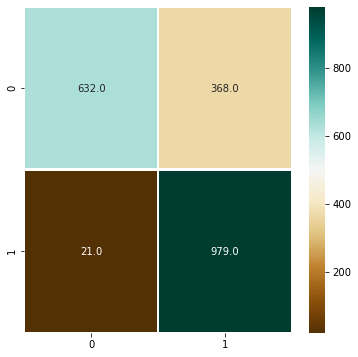

In [13]:
y_preds = model.predict_classes(x_test)
y_true = y_test

conf_matrix = confusion_matrix(y_pred=y_preds,y_true=y_true)

import seaborn as sns


plt.subplots(figsize=(6,6))
sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5,cmap="BrBG")
plt.show()

# Conclusion

Thanks for your attention, I will wait for your comments,questions and upvotes.